<a href="https://colab.research.google.com/github/Balaji507/Leaf-disease-detection/blob/main/3_Grape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==1.0.0-beta0

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras.utils as image
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow 
import keras
from tensorflow.keras.models import Model as model

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [ ]:
classification_result="grape"

In [ ]:
if classification_result=='corn and maize':
  train_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/train"
  test_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/test"
  det_dictionary = {0: "blight", 1: "common rust", 2: "gray leaf spot", 3: "healthy"}
elif classification_result=='cotton':
  train_path="/content/drive/MyDrive/Datasets/Cotton/train"
  test_path="/content/drive/MyDrive/Datasets/Cotton/test"
  det_dictionary = {0: "Black root rot", 1: "Lint contamination", 2: "Healthy", 3: "Healthy"}
elif classification_result=='grape':
  train_path="/content/drive/MyDrive/Datasets/Grape/train"
  test_path="/content/drive/MyDrive/Datasets/Grape/test"
  det_dictionary = {0: "Black rot(grape)", 1: "Grape Esca (Black Measles)", 2: "leaf blight (Isariopsis Leaf Spot)", 3: "healthy"}
elif classification_result=='potato':
  train_path="/content/drive/MyDrive/Datasets/Potato/Train"
  test_path="/content/drive/MyDrive/Datasets/Potato/Test"
  det_dictionary = {0: "Early blight", 1: "Healthy", 2: "late blight"}
elif classification_result=='tomato':
  train_path="/content/drive/MyDrive/Datasets/Tomato/train"
  test_path="/content/drive/MyDrive/Datasets/Tomato/test"
  det_dictionary = {0: "bacterial spot", 1: "Early Blight", 2: "Healthy", 3: "Late Blight", 4: "Leaf Mold", 5: "Septoria leaf spot", 6: "Spider mites", 7: "Target spot", 8: "Mosaic virus", 9: "Yellow leaf curl virus"}

In [ ]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory=train_path,target_size=(256,256),batch_size = 32,class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory=test_path, target_size=(256,256),batch_size = 32,class_mode = 'categorical')

Found 5776 images belonging to 4 classes.
Found 1806 images belonging to 4 classes.


In [ ]:
num_classes=len(traindata.class_indices)
print(num_classes)

4


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
history = model.fit_generator(traindata,epochs=12,validation_data=testdata)

Epoch 1/12
181/181 [==============================] - 3087s 17s/step - loss: 0.6913 - accuracy: 0.7135 - val_loss: 0.6603 - val_accuracy: 0.7796
Epoch 2/12
181/181 [==============================] - 929s 5s/step - loss: 0.2353 - accuracy: 0.9145 - val_loss: 0.1444 - val_accuracy: 0.9546
Epoch 3/12
181/181 [==============================] - 927s 5s/step - loss: 0.1423 - accuracy: 0.9515 - val_loss: 0.1392 - val_accuracy: 0.9452
Epoch 4/12
181/181 [==============================] - 924s 5s/step - loss: 0.1041 - accuracy: 0.9645 - val_loss: 0.0792 - val_accuracy: 0.9684
Epoch 5/12
181/181 [==============================] - 913s 5s/step - loss: 0.0742 - accuracy: 0.9735 - val_loss: 0.0560 - val_accuracy: 0.9784
Epoch 6/12
181/181 [==============================] - 916s 5s/step - loss: 0.0744 - accuracy: 0.9758 - val_loss: 0.2368 - val_accuracy: 0.9363
Epoch 7/12
181/181 [==============================] - 914s 5s/step - loss: 0.0649 - accuracy: 0.9773 - val_loss: 0.1028 - val_accuracy: 0.96

In [ ]:
model.save("/content/drive/MyDrive/Model_Save/grape.h5")

In [ ]:
from keras.models import load_model
classifier=load_model("/content/drive/MyDrive/Model_Save/grape.h5")

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datasets/Grape/test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/0b267a2e-c32d-47cd-8494-efc12a326493___FAM_L.Blight 0815_flipLR.JPG', target_size=(256, 256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x / 255.
predictions = classifier.predict(x)
class_index = predictions
class_index1 = np.argmax(predictions)
print(class_index)
detection_result = (det_dictionary[class_index1])
print(detection_result)

1/1 [==============================] - 0s 78ms/step
[[2.7826849e-05 1.0875588e-05 9.9996126e-01 5.7871897e-08]]
leaf blight (Isariopsis Leaf Spot)


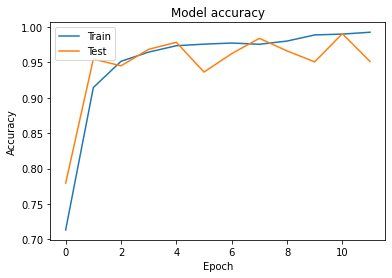

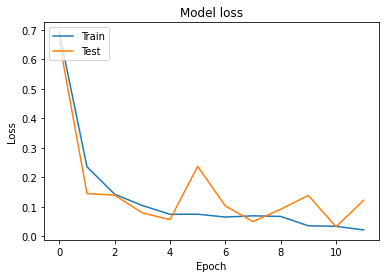

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()